In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import math

c1 = np.array([3.645833333E5, 3.15E6, 1.775E6, 1.0275E7, 4.975E6, 4.325E6,4.0E6]) #mod
c1n = c1/3.645833333E5
c2 = np.array([3.645833333E5, 3.375E6, 5.275E6, np.nan, 4.175E8, 1.0E9, 7.0E8]) #np.nan --> overgrown #mod
c2n = c2/3.645833333E5
#print((np.log10(c2[2])+np.log10(c2[4])))
#c2_interpolatedish = np.array([3.646E5, 3.375E6, 5.275E6, 15.342878943789351E6, 4.175E8])
c3 = np.array([3.645833333E5, 1.875E6, 2.225E6, 2.25E6, 1.15E6, 9.75E5, 1.2E6]) #mod
c3n = c3/3.645833333E5

g4 = np.array([3.645833333E5, 8.0E8, 1.975E9, 1.775E10, 1.8E9, 9.75E9, 9.75E9]) #mod
g4n = g4/3.645833333E5
g5 = np.array([3.645833333E5, 8.75E8, 2.233333333E9, 1.125E10, 3.875E10, 2.925E9, 6.775E10]) #mod
g5n = g5/3.645833333E5
g6 = np.array([3.645833333E5, 1.325E9, 3.25E9, 4.45E10, 2.65E9, 4.775E9, 3.4E9]) #mod
g6n = g6/3.645833333E5

t7 = np.array([3.645833333E5, 9.25E5, 1.4E6, 2.55E6, 9.5E6, 9.5E7, 1.9E9]) #mod
t7n = t7/3.645833333E5
t8 = np.array([3.645833333E5, 1.275E6, 3.05E6, 5.75E7, 2.3E9, 2.425E10, 9.75E9]) #mod
t8n = t8/3.645833333E5
t9 = np.array([3.645833333E5, 7.75E5, 2.225E6, 1.55E7, 2.15E10, 9.225E10, 5.6E10]) #mod
t9n = t9/3.645833333E5

b10 = np.array([6.0E5, np.nan, np.nan, np.nan]) #np.nan(s) --> No cells present #mod
b10n = b10/6.0E5
b11 = np.array([6.0E5, 1.35E3, 2.575E5, 1.25E7]) #mod
b11n = b11/6.0E5
b12 = np.array([6.0E5, 2.45E7, 5.05E7, 2.375E7]) #mod
b12n = b12/6.0E5


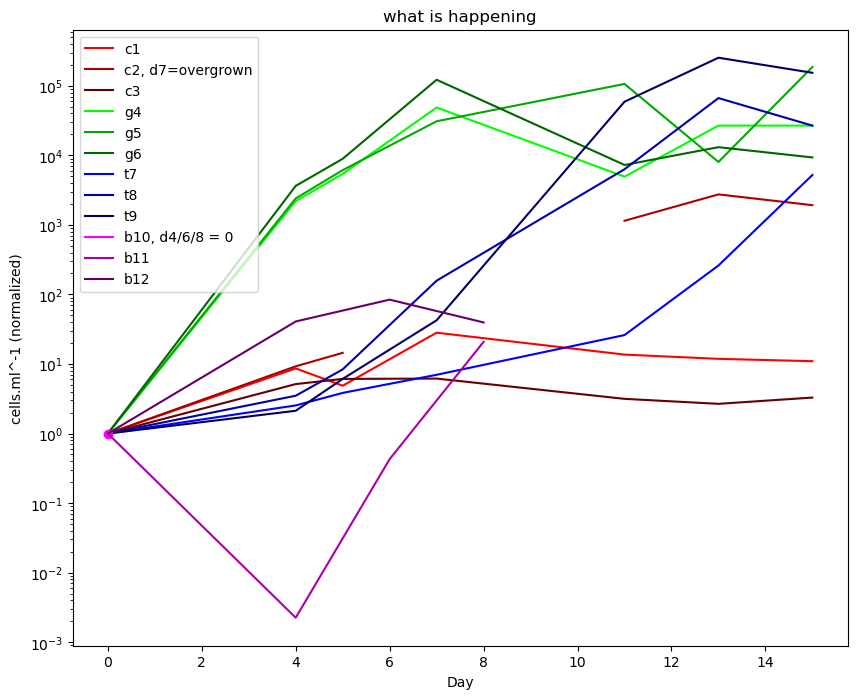

In [2]:
day = np.array([0, 4, 5, 7, 11, 13, 15]) #mod
day_b = np.array([0, 4, 6, 8]) #mod

plt.figure(figsize=(10, 8))
plt.semilogy(day, c1n, label="c1", color="#FF0000")
plt.semilogy(day, c2n, label="c2, d7=overgrown", color="#AA0000")
plt.semilogy(day, c3n, label="c3", color="#660000")
plt.semilogy(day, g4n, label="g4", color="#00FF00")
plt.semilogy(day, g5n, label="g5", color="#00AA00")
plt.semilogy(day, g6n, label="g6", color="#006600")
plt.semilogy(day, t7n, label="t7", color="#0000FF")
plt.semilogy(day, t8n, label="t8", color="#0000AA")
plt.semilogy(day, t9n, label="t9", color="#000066")
plt.semilogy(day_b, b10n, label="b10, d4/6/8 = 0", color="#FF00FF") #mod (label)
plt.semilogy(0, b10n[0], 'o', color="#FF00FF")
plt.semilogy(day_b, b11n, label="b11", color="#AA00AA")
plt.semilogy(day_b, b12n, label="b12", color="#660066")

plt.xlabel("Day")
plt.ylabel("cells.ml^-1 (normalized)")
plt.title("what is happening")
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'baked moon')

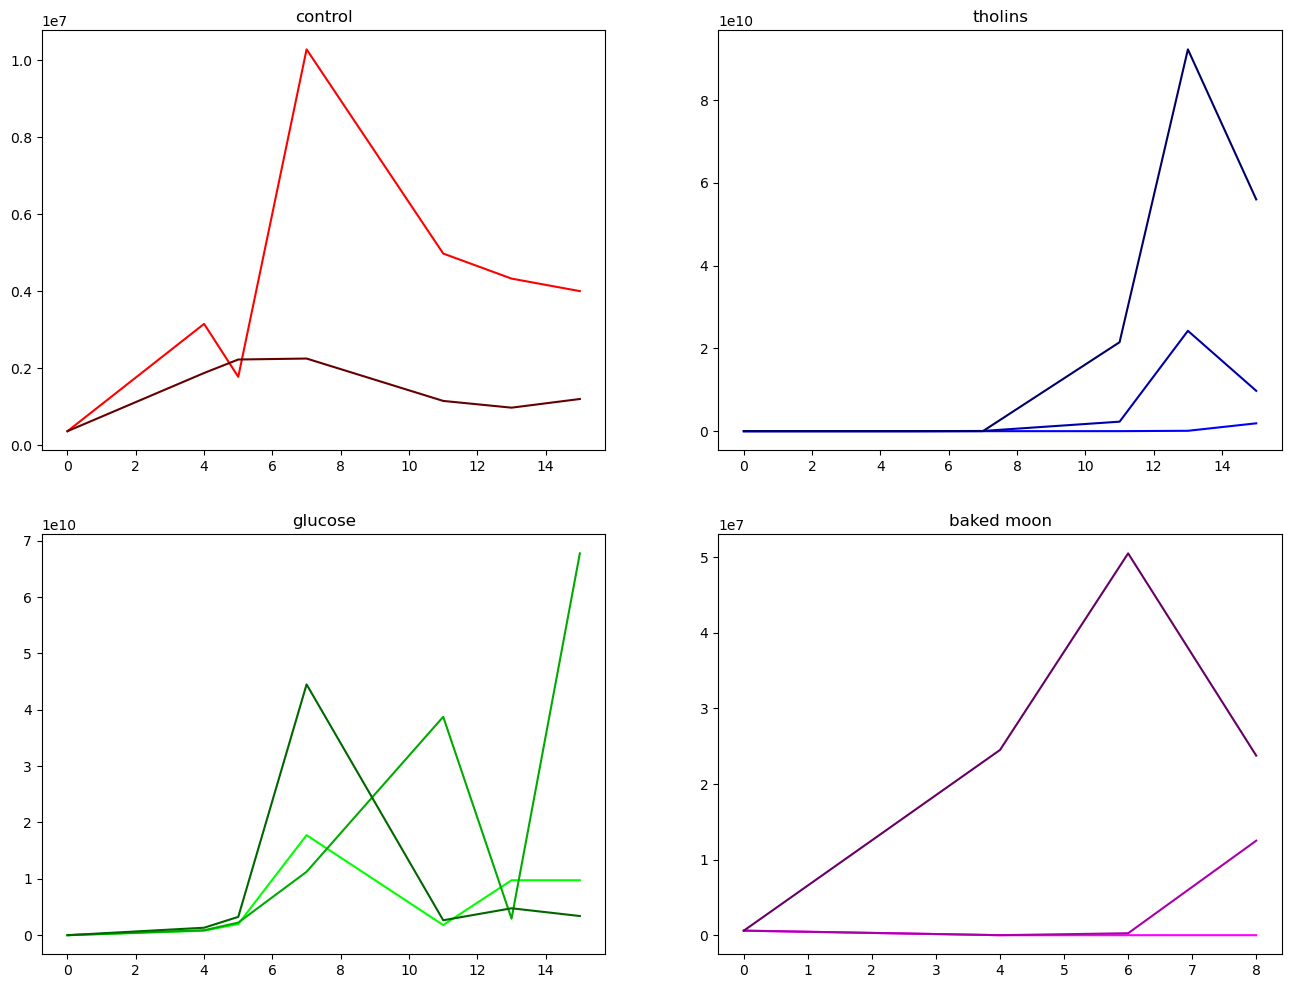

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].plot(day, c1, label="c1", color="#FF0000")
#axs[0, 0].plot(day, c2, label="c2, d7=overgrown", color="#AA0000")
axs[0, 0].plot(day, c3, label="c3", color="#660000")
axs[0, 0].set_title("control")

axs[1, 0].plot(day, g4, label="g4", color="#00FF00")
axs[1, 0].plot(day, g5, label="g5", color="#00AA00")
axs[1, 0].plot(day, g6, label="g6", color="#006600")
axs[1, 0].set_title("glucose")

axs[0, 1].plot(day, t7, label="t7", color="#0000FF")
axs[0, 1].plot(day, t8, label="t8", color="#0000AA")
axs[0, 1].plot(day, t9, label="t9", color="#000066")
axs[0, 1].set_title("tholins")

axs[1, 1].plot(day_b, b10, label="b10, d4=0 d6=0", color="#FF00FF")
axs[1, 1].plot(day_b, (b10[0], 0, 0, 0), color="#FF00FF") #mod
axs[1, 1].plot(day_b, b11, label="b11", color="#AA00AA")
axs[1, 1].plot(day_b, b12, label="b12", color="#660066")
axs[1, 1].set_title("baked moon")




In [4]:
def mean_of_arrays (a,b,c):
    mean_arr = np.array([(a[i]+b[i]+c[i])/3 for i in range (len(a))])
    return mean_arr

def mean_of_arrays_adj (a,b):
    mean_arr_adj = np.array([(a[i]+b[i])/2 for i in range (len(a))])
    return mean_arr_adj

c_mean = mean_of_arrays(c1,c2,c3)
c_mean[3] = (c1[3]+c3[3])/2
c_mean_n = c_mean/3.645833333E5
c_mean_adj = mean_of_arrays_adj(c1,c3)
c_mean_n_adj = c_mean_adj/3.645833333E5

g_mean = mean_of_arrays(g4,g5,g6)
g_mean_n = g_mean/3.645833333E5

t_mean = mean_of_arrays(t7,t8,t9)
t_mean_n = t_mean/3.645833333E5

b_mean = mean_of_arrays(b10,b11,b12)
b_mean[1] = (0+b11[1]+b12[1])/3
b_mean[2] = (0+b11[2]+b12[2])/3
b_mean[3] = (0+b11[3]+b12[3])/3
#mod (if new b10 is still 0)
b_mean_n = b_mean/6.0E5
b_mean_adj = mean_of_arrays_adj(b11,b12)
b_mean_n_adj = b_mean_adj/6.0E5

print(c_mean, g_mean, t_mean, b_mean)


[3.64583333e+05 2.80000000e+06 3.09166667e+06 6.26250000e+06
 1.41208333e+08 3.35100000e+08 2.35066667e+08] [3.64583333e+05 1.00000000e+09 2.48611111e+09 2.45000000e+10
 1.44000000e+10 5.81666667e+09 2.69666667e+10] [3.64583333e+05 9.91666667e+05 2.22500000e+06 2.51833333e+07
 7.93650000e+09 3.88650000e+10 2.25500000e+10] [  600000.          8167116.66666667 16919166.66666667 12083333.33333333]


In [5]:
import statistics

c_matrix = np.column_stack((c1,c2,c3))
c_matrix[3][1] = np.nan
c_matrix_adj = np.column_stack((c1,c3))
g_matrix = np.column_stack((g4,g5,g6))
t_matrix = np.column_stack((t7,t8,t9))
b_matrix = np.column_stack((b10,b11,b12))
b_matrix[1][0] = 0
b_matrix[2][0] = 0
b_matrix[3][0] = 0
#mod (if new b10=0)
b_matrix_adj = np.column_stack((b11,b12))
print(b_matrix)
print(c_matrix)
#print(c_matrix[0])

#print(b_matrix)

day0_stdev = np.std([4.12E5, 3.167E5])
day0_b_stdev = np.std([6.0E5])

day_0_sem = day0_stdev/(2**0.5)
day_0_b_sem = day0_b_stdev/(1**0.5)
print(day0_stdev)
print(day0_b_stdev)



#for i in len(c1):
stdev_c = np.column_stack((np.std(c_matrix[0]), np.std(c_matrix[1]), np.std(c_matrix[2]), np.std(c_matrix[3]), np.std(c_matrix[4]), np.std(c_matrix[5]), np.std(c_matrix[6]))) #mod
stdev_c[0][0] = day0_stdev
stdev_c[0][3] = np.std([c_matrix[3][0], c_matrix[3][2]])
stdev_c_n = stdev_c/3.645833333E5
sem_c = stdev_c/(3**0.5)
sem_c[0][0] = day_0_sem
sem_c[0][3] = (sem_c[0][3]*(3**0.5))/(2**0.5)
sem_c_n = sem_c/3.645833333E5

stdev_c_adj = np.column_stack((np.std(c_matrix_adj[0]), np.std(c_matrix_adj[1]), np.std(c_matrix_adj[2]), np.std(c_matrix_adj[3]), np.std(c_matrix_adj[4]), np.std(c_matrix_adj[5]), np.std(c_matrix_adj[6]))) #mod
stdev_c_adj[0][0] = day0_stdev
stdev_c_n_adj = stdev_c_adj/3.645833333E5
sem_c_adj = stdev_c_adj/(3**0.5)
sem_c_adj[0][0] = day_0_sem
sem_c_n_adj = sem_c_adj/3.645833333E5


print("stdev_c_n", stdev_c_n)
print("stdev_c_n/(3**0.5)", stdev_c_n/(3**0.5))
print("sem_c_n", sem_c_n)

stdev_g = np.column_stack((np.std(g_matrix[0]), np.std(g_matrix[1]), np.std(g_matrix[2]), np.std(g_matrix[3]), np.std(g_matrix[4]), np.std(g_matrix[5]), np.std(g_matrix[6]))) #mod
stdev_g[0][0] = day0_stdev
stdev_g_n = stdev_g/3.645833333E5
sem_g = stdev_g/(3**0.5)
sem_g[0][0] = day_0_sem
sem_g_n = sem_g/3.645833333E5
print("stdev_g",stdev_g)

stdev_t = np.column_stack((np.std(t_matrix[0]), np.std(t_matrix[1]), np.std(t_matrix[2]), np.std(t_matrix[3]), np.std(t_matrix[4]), np.std(t_matrix[5]), np.std(t_matrix[6]))) #mod
stdev_t[0][0] = day0_stdev
stdev_t_n = stdev_t/3.645833333E5
sem_t = stdev_t/(3**0.5)
sem_t[0][0] = day_0_sem
sem_t_n = sem_t/3.645833333E5
print("stdev_t",stdev_t)

stdev_b = np.column_stack((np.std(b_matrix[0]), np.std(b_matrix[1]), np.std(b_matrix[2]), np.std(b_matrix[3]))) #mod
stdev_b[0][0] = day0_b_stdev
stdev_b_n = stdev_b/6.0E5
sem_b = stdev_b/(3**0.5)
sem_b[0][0] = day_0_b_sem
sem_b_n = sem_b/6.0E5
print("stdev_b",stdev_b)

stdev_b_adj = np.column_stack((np.std(b_matrix_adj[0]), np.std(b_matrix_adj[1]), np.std(b_matrix_adj[2]), np.std(b_matrix_adj[3]))) #mod
stdev_b_adj[0][0] = day0_b_stdev
stdev_b_n_adj = stdev_b_adj/6.0E5
sem_b_adj = stdev_b_adj/(2**0.5)
sem_b_adj[0][0] = day_0_b_sem
sem_b_n_adj = sem_b_adj/6.0E5

print("stdev_c_n", stdev_c_n)
print("stdev_g_n", stdev_g_n)
print("stdev_t_n", stdev_t_n)
print("stdev_b_n", stdev_b_n)


[[6.000e+05 6.000e+05 6.000e+05]
 [0.000e+00 1.350e+03 2.450e+07]
 [0.000e+00 2.575e+05 5.050e+07]
 [0.000e+00 1.250e+07 2.375e+07]]
[[3.64583333e+05 3.64583333e+05 3.64583333e+05]
 [3.15000000e+06 3.37500000e+06 1.87500000e+06]
 [1.77500000e+06 5.27500000e+06 2.22500000e+06]
 [1.02750000e+07            nan 2.25000000e+06]
 [4.97500000e+06 4.17500000e+08 1.15000000e+06]
 [4.32500000e+06 1.00000000e+09 9.75000000e+05]
 [4.00000000e+06 7.00000000e+08 1.20000000e+06]]
47650.0
0.0
stdev_c_n [[1.30697143e-01 1.81163586e+00 4.26443479e+00 1.10057143e+01
  5.35882839e+02 1.28957428e+03 9.01740343e+02]]
stdev_c_n/(3**0.5) [[7.54580306e-02 1.04594845e+00 2.46207257e+00 6.35415211e+00
  3.09392101e+02 7.44536055e+02 5.20620030e+02]]
sem_c_n [[9.24168360e-02 1.04594845e+00 2.46207257e+00 7.78221520e+00
  3.09392101e+02 7.44536055e+02 5.20620030e+02]]
stdev_g [[4.76500000e+04 2.31840462e+08 5.50350618e+08 1.43889425e+10
  1.72215466e+10 2.88200837e+09 2.89544566e+10]]
stdev_t [[4.76500000e+04 2.09

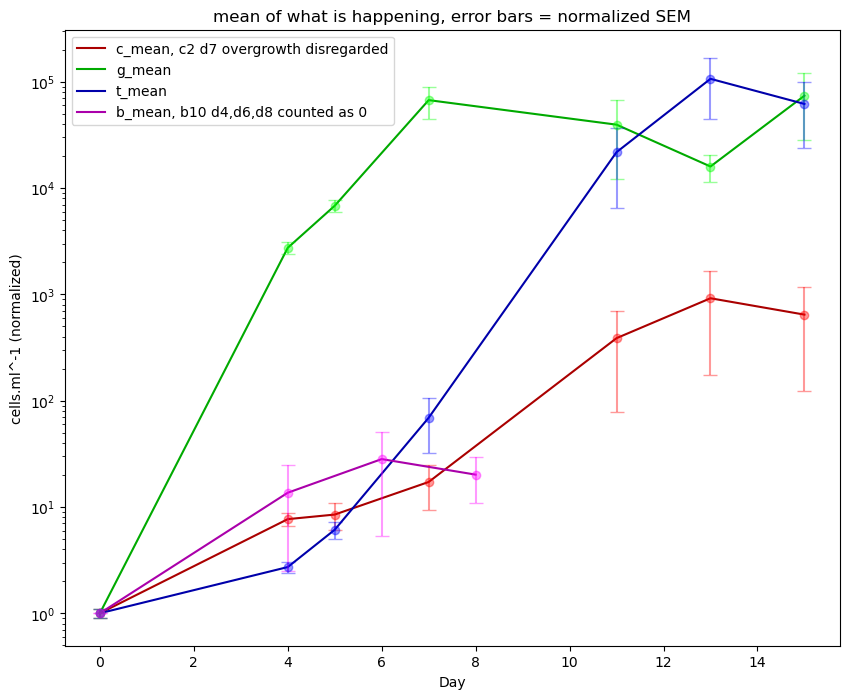

In [6]:

plt.figure(figsize=(10, 8))

plt.semilogy(day, c_mean_n, label="c_mean, c2 d7 overgrowth disregarded", color="#AA0000")
plt.errorbar(day, c_mean_n, yerr=sem_c_n, fmt='o', capsize=5, color="#FF0000", alpha=0.4)

plt.semilogy(day, g_mean_n, label="g_mean", color="#00AA00")
plt.errorbar(day, g_mean_n, yerr=sem_g_n, fmt='o', capsize=5, color="#00FF00", alpha=0.4)

plt.semilogy(day, t_mean_n, label="t_mean", color="#0000AA")
plt.errorbar(day, t_mean_n, yerr=sem_t_n, fmt='o', capsize=5, color="#0000FF", alpha=0.4)

plt.semilogy(day_b, b_mean_n, label="b_mean, b10 d4,d6,d8 counted as 0", color="#AA00AA") #mod (label)
plt.errorbar(day_b, b_mean_n, yerr=sem_b_n, fmt='o', capsize=5, color="#FF00FF", alpha=0.4)


plt.xlabel("Day")
plt.ylabel("cells.ml^-1 (normalized)")
plt.title("mean of what is happening, error bars = normalized SEM")
plt.legend(loc='upper left')
plt.show()


[ 1.          6.89142857  5.48571429 17.17714286  8.4         7.26857143
  7.13142857]
[ 1.         20.41779167 42.29791667 30.20833333]


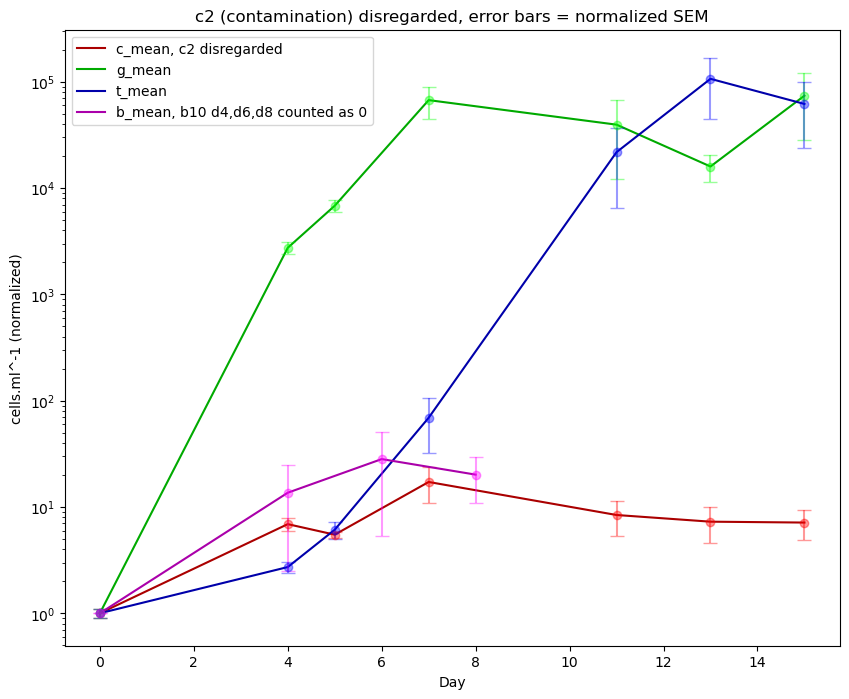

In [7]:
print(c_mean_n_adj)
print(b_mean_n_adj)
plt.figure(figsize=(10, 8))

plt.semilogy(day, c_mean_n_adj, label="c_mean, c2 disregarded", color="#AA0000")
plt.errorbar(day, c_mean_n_adj, yerr=sem_c_n_adj, fmt='o', capsize=5, color="#FF0000", alpha=0.4)

plt.semilogy(day, g_mean_n, label="g_mean", color="#00AA00")
plt.errorbar(day, g_mean_n, yerr=sem_g_n, fmt='o', capsize=5, color="#00FF00", alpha=0.4)

plt.semilogy(day, t_mean_n, label="t_mean", color="#0000AA")
plt.errorbar(day, t_mean_n, yerr=sem_t_n, fmt='o', capsize=5, color="#0000FF", alpha=0.4)

plt.semilogy(day_b, b_mean_n, label="b_mean, b10 d4,d6,d8 counted as 0", color="#AA00AA")
plt.errorbar(day_b, b_mean_n, yerr=sem_b_n, fmt='o', capsize=5, color="#FF00FF", alpha=0.4)


plt.xlabel("Day")
plt.ylabel("cells.ml^-1 (normalized)")
plt.title("c2 (contamination) disregarded, error bars = normalized SEM")
plt.legend(loc='upper left')
plt.show()


In [8]:
"""
plt.figure(figsize=(10, 8))

plt.semilogy(day, c_mean_n, label="c_mean, c2 d7 overgrowth disregarded", color="#AA0000")
plt.errorbar(day, c_mean_n, yerr=stdev_c_n, fmt='o', capsize=5, color="#FF0000", alpha=0.4)

plt.semilogy(day, g_mean_n, label="g_mean", color="#00AA00")
plt.errorbar(day, g_mean_n, yerr=stdev_g_n, fmt='o', capsize=5, color="#00FF00", alpha=0.4)

plt.semilogy(day, t_mean_n, label="t_mean", color="#0000AA")
plt.errorbar(day, t_mean_n, yerr=stdev_t_n, fmt='o', capsize=5, color="#0000FF", alpha=0.4)

plt.semilogy(day_b, b_mean_n, label="b_mean, b10 d4 counted as 0", color="#AA00AA")
plt.errorbar(day_b, b_mean_n, yerr=stdev_b_n, fmt='o', capsize=5, color="#FF00FF", alpha=0.4)


plt.xlabel("Day")
plt.ylabel("cells.ml^-1 (normalized)")
plt.title("what is happening, stdev_x_n")
plt.legend(loc='upper left')
plt.show()
"""

"""
plt.figure(figsize=(10, 8))

plt.semilogy(day, c_mean, label="c_mean, c2 d7 overgrowth disregarded", color="#AA0000")
plt.errorbar(day, c_mean, yerr=sem_c, fmt='o', capsize=5, color="#FF0000", alpha=0.4)

plt.semilogy(day, g_mean, label="g_mean", color="#00AA00")
plt.errorbar(day, g_mean, yerr=sem_g, fmt='o', capsize=5, color="#00FF00", alpha=0.4)

plt.semilogy(day, t_mean, label="t_mean", color="#0000AA")
plt.errorbar(day, t_mean, yerr=sem_t, fmt='o', capsize=5, color="#0000FF", alpha=0.4)

plt.semilogy(day_b, b_mean, label="b_mean, b10 d4 counted as 0", color="#AA00AA")
plt.errorbar(day_b, b_mean, yerr=sem_b, fmt='o', capsize=5, color="#FF00FF", alpha=0.4)


plt.xlabel("Day")
plt.ylabel("cells.ml^-1 (normalized)")
plt.title("what is happening, sem_x")
plt.legend(loc='upper left')
plt.show()
"""

"""
plt.figure(figsize=(10, 8))

plt.semilogy(day, c_mean, label="c_mean, c2 d7 overgrowth disregarded", color="#AA0000")
plt.errorbar(day, c_mean, yerr=stdev_c, fmt='o', capsize=5, color="#FF0000", alpha=0.4)

plt.semilogy(day, g_mean, label="g_mean", color="#00AA00")
plt.errorbar(day, g_mean, yerr=stdev_g, fmt='o', capsize=5, color="#00FF00", alpha=0.4)

plt.semilogy(day, t_mean, label="t_mean", color="#0000AA")
plt.errorbar(day, t_mean, yerr=stdev_t, fmt='o', capsize=5, color="#0000FF", alpha=0.4)

plt.semilogy(day_b, b_mean, label="b_mean, b10 d4 counted as 0", color="#AA00AA")
plt.errorbar(day_b, b_mean, yerr=stdev_b, fmt='o', capsize=5, color="#FF00FF", alpha=0.4)


plt.xlabel("Day")
plt.ylabel("cells.ml^-1 (normalized)")
plt.title("what is happening, stdev_x")
plt.legend(loc='upper left')
plt.show()
"""

'\nplt.figure(figsize=(10, 8))\n\nplt.semilogy(day, c_mean, label="c_mean, c2 d7 overgrowth disregarded", color="#AA0000")\nplt.errorbar(day, c_mean, yerr=stdev_c, fmt=\'o\', capsize=5, color="#FF0000", alpha=0.4)\n\nplt.semilogy(day, g_mean, label="g_mean", color="#00AA00")\nplt.errorbar(day, g_mean, yerr=stdev_g, fmt=\'o\', capsize=5, color="#00FF00", alpha=0.4)\n\nplt.semilogy(day, t_mean, label="t_mean", color="#0000AA")\nplt.errorbar(day, t_mean, yerr=stdev_t, fmt=\'o\', capsize=5, color="#0000FF", alpha=0.4)\n\nplt.semilogy(day_b, b_mean, label="b_mean, b10 d4 counted as 0", color="#AA00AA")\nplt.errorbar(day_b, b_mean, yerr=stdev_b, fmt=\'o\', capsize=5, color="#FF00FF", alpha=0.4)\n\n\nplt.xlabel("Day")\nplt.ylabel("cells.ml^-1 (normalized)")\nplt.title("what is happening, stdev_x")\nplt.legend(loc=\'upper left\')\nplt.show()\n'